<a href="https://colab.research.google.com/github/Marshmellowon/Mnist_VAE/blob/master/1_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**
Logistic regression for MNIST classification.

In [ ]:
import numpy as np
import tensorflow as tf

###**Set training parameters**

In [ ]:
# Parameters
learning_rate = 0.001
training_epochs = 6
batch_size = 600

###**Load MNIST data**

In [ ]:
# Import MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train_dataset = (
    tf.data.Dataset.from_tensor_slices((tf.reshape(x_train, [-1, 784]), y_train))
    .batch(batch_size)
    .shuffle(1000)
    )

train_dataset = (
    train_dataset.map(lambda x, y:
                      (tf.divide(tf.cast(x, tf.float32), 255.0),
                       tf.reshape(tf.one_hot(y, 10), (-1, 10))))
    )

###**Set model**
> $\hat{y} = \sigma(W x + b)$

*   $x$ : input (image)
*   $y$ : output (label)
*   $\sigma(z) = \frac{\exp(z_i)}{\sum_{i}\exp(z_i)}$ : softmax function




In [ ]:
# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [ ]:
# Construct model
model = lambda x: tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

###**Train model**

* **Method**: Adam
* **Loss function**: Binary cross-entropy  
> $l(y,\hat{y}) = -\frac{1}{d} \sum_{i=1}^{d} y_i \cdot \log{\hat{y}_i} + (1-y_i) \cdot \log{(1-\hat{y}_i)}$
, where $d$ is output dimension.


In [ ]:
# Minimize error using cross entropy
compute_loss = lambda true, pred: tf.reduce_mean(tf.reduce_sum(tf.losses.binary_crossentropy(true, pred), axis=-1))
# caculate accuracy
compute_accuracy = lambda true, pred: tf.reduce_mean(tf.keras.metrics.categorical_accuracy(true, pred))
# Gradient Descent
optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# Run training loop
for epoch in range(training_epochs):
    for i, (x_, y_) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            pred = model(x_)
            loss = compute_loss(y_, pred)
        acc = compute_accuracy(y_, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))

        if i % 20 == 0:
          print("[{:2d},{:3d}] loss {:5.2f} acc {:2.2f}".format(epoch, i, loss.numpy(), acc.numpy()))

[ 0,  0] loss 195.05 acc 0.11
[ 0, 20] loss 141.07 acc 0.75
[ 0, 40] loss 106.28 acc 0.78
[ 0, 60] loss 93.08 acc 0.82
[ 0, 80] loss 74.17 acc 0.82
[ 1,  0] loss 67.64 acc 0.85
[ 1, 20] loss 51.30 acc 0.89
[ 1, 40] loss 53.48 acc 0.88
[ 1, 60] loss 47.90 acc 0.89
[ 1, 80] loss 50.61 acc 0.85
[ 2,  0] loss 48.35 acc 0.87
[ 2, 20] loss 44.80 acc 0.89
[ 2, 40] loss 44.16 acc 0.88
[ 2, 60] loss 40.36 acc 0.91
[ 2, 80] loss 52.53 acc 0.85
[ 3,  0] loss 42.18 acc 0.90
[ 3, 20] loss 40.84 acc 0.90
[ 3, 40] loss 46.46 acc 0.87
[ 3, 60] loss 45.40 acc 0.88
[ 3, 80] loss 42.78 acc 0.89
[ 4,  0] loss 36.60 acc 0.91
[ 4, 20] loss 24.79 acc 0.94
[ 4, 40] loss 36.62 acc 0.91
[ 4, 60] loss 43.43 acc 0.89
[ 4, 80] loss 37.80 acc 0.89
[ 5,  0] loss 42.18 acc 0.88
[ 5, 20] loss 34.42 acc 0.91
[ 5, 40] loss 28.97 acc 0.92
[ 5, 60] loss 43.32 acc 0.87
[ 5, 80] loss 45.93 acc 0.88


###**Test model**
Test trained model.

In [ ]:
# Select test data
num_test_sel = 4
num_test = x_test.shape[0]
idx_rand = np.random.permutation(np.arange(0, num_test))
idx_rand_sel = idx_rand[0:num_test_sel]

x_sel = x_test[idx_rand_sel, :, :]
y_sel = y_test[idx_rand_sel]

_x_in = tf.divide(tf.cast(x_sel, tf.float32), 255.0)
x_in = tf.reshape(_x_in, [-1, 784])
y_out = model(x_in)
y_out = y_out.numpy()
y_sel_pred = np.argmax(y_out, axis=1)

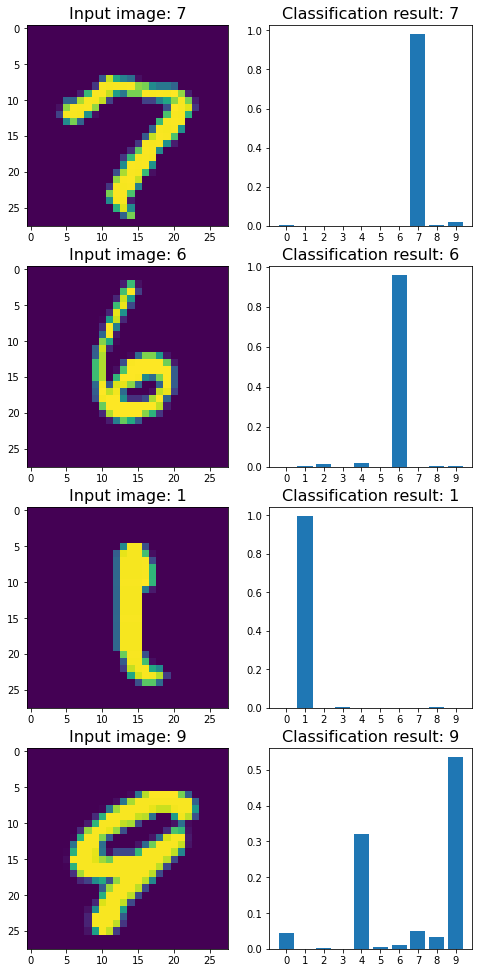

In [ ]:
# Plot test result
import matplotlib.pyplot as plt
from matplotlib import gridspec
barx = np.arange(0,10)

fig = plt.figure(figsize=(8, 4.25 * num_test_sel)) 
gs = gridspec.GridSpec(nrows=num_test_sel,
                       ncols=2,
                       height_ratios=[1]*num_test_sel, 
                       width_ratios=[1, 1]
                       )

for nidx_d in range(0, num_test_sel):
  x_sel_plot = x_sel[nidx_d, :, :]
  y_sel_plot = y_sel[nidx_d]
  y_out_plot = y_out[nidx_d, :]
  y_sel_pred_plot = y_sel_pred[nidx_d]
  ax0 = plt.subplot(gs[nidx_d, 0])
  ax0.imshow(x_sel_plot)
  ax0.title.set_text('Input image: {:d}'.format(y_sel_plot))
  ax0.title.set_fontsize(16)

  ax1 = plt.subplot(gs[nidx_d, 1])
  ax1.bar(barx, y_out_plot.reshape(-1))
  plt.xticks(barx)
  ax1.title.set_text('Classification result: {:d}'.format(y_sel_pred_plot))
  ax1.title.set_fontsize(16)

plt.show()